<a href="https://colab.research.google.com/github/quiquedalfo/DALFO-proyecto/blob/main/Proyecto_IMDB_reviews_Dalfo_Enrique_Comision_75830.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisis de reviews de peliculas de IMDB

El dataset se descargo de https://www.kaggle.com/datasets/luisdiegofv97/imdb-dataset-of-50k-movie-reviews-spanish , contiene informacion de reviews de peliculas en ingles y en español.
El analisis hara foco en las reviews en español.

In [32]:
# Para procesar texto en español
!pip install nltk spacy sklearn

# Descargar modelos y recursos en español
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

!python -m spacy download es_core_news_sm

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 40.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [33]:
!pip install unidecode

In [34]:
import pandas as pd
#import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
df_original = pd.read_csv("/content/drive/MyDrive/IMDB PELIS.zip", sep=",")
df_original.head()

,Unnamed: 0,review_en,review_es,sentiment,sentimiento
0,0,One of the other reviewers has mentioned that ...,Uno de los otros críticos ha mencionado que de...,positive,positivo
1,1,A wonderful little production. The filming tec...,Una pequeña pequeña producción.La técnica de f...,positive,positivo
2,2,I thought this was a wonderful way to spend ti...,Pensé que esta era una manera maravillosa de p...,positive,positivo
3,3,Basically there's a family where a little boy ...,"Básicamente, hay una familia donde un niño peq...",negative,negativo
4,4,"Petter Mattei's ""Love in the Time of Money"" is...","El ""amor en el tiempo"" de Petter Mattei es una...",positive,positivo


In [37]:
df_original.shape

(50000, 5)

In [38]:
df = df_original[:5000]
df = df[['review_es', 'sentimiento']].copy()
df.head()

,review_es,sentimiento
0,Uno de los otros críticos ha mencionado que de...,positivo
1,Una pequeña pequeña producción.La técnica de f...,positivo
2,Pensé que esta era una manera maravillosa de p...,positivo
3,"Básicamente, hay una familia donde un niño peq...",negativo
4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo


In [39]:
# Convertimos el texto a minúsculas
df['lower_text'] = df['review_es'].str.lower()

# Eliminamos caracteres especiales y números
df['text'] = df['lower_text'].str.replace(r'[^a-záéíóúñü\s]', '', regex=True) # ^a-z significa reemplaza todo lo que no este dentro de la a-z minuscula con un campo vacio '' (en la celda anterior convertimos todo el texto a lowercase)

# Miramos el dataset luego del procesamiento
df

,review_es,sentimiento,lower_text,text
0,Uno de los otros críticos ha mencionado que de...,positivo,uno de los otros críticos ha mencionado que de...,uno de los otros críticos ha mencionado que de...
1,Una pequeña pequeña producción.La técnica de f...,positivo,una pequeña pequeña producción.la técnica de f...,una pequeña pequeña producciónla técnica de fi...
2,Pensé que esta era una manera maravillosa de p...,positivo,pensé que esta era una manera maravillosa de p...,pensé que esta era una manera maravillosa de p...
3,"Básicamente, hay una familia donde un niño peq...",negativo,"básicamente, hay una familia donde un niño peq...",básicamente hay una familia donde un niño pequ...
4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo,"el ""amor en el tiempo"" de petter mattei es una...",el amor en el tiempo de petter mattei es una p...
...,...,...,...,...
4995,Una interesante película de strass con múltipl...,negativo,una interesante película de strass con múltipl...,una interesante película de strass con múltipl...
4996,Vi a esta serie cuando salió por primera vez e...,positivo,vi a esta serie cuando salió por primera vez e...,vi a esta serie cuando salió por primera vez e...
4997,"Una vez más, Jet Li trae su presencia carismát...",positivo,"una vez más, jet li trae su presencia carismát...",una vez más jet li trae su presencia carismáti...
4998,"¡Alquilé esta película, después de escuchar a ...",negativo,"¡alquilé esta película, después de escuchar a ...",alquilé esta película después de escuchar a ch...


In [40]:
import pandas as pd
from unidecode import unidecode

# Función para remover acentos
df['text'] = df['text'].apply(unidecode)

# Mostrar el resultado
df['text']

,text
0,uno de los otros criticos ha mencionado que de...
1,una pequena pequena produccionla tecnica de fi...
2,pense que esta era una manera maravillosa de p...
3,basicamente hay una familia donde un nino pequ...
4,el amor en el tiempo de petter mattei es una p...
...,...
4995,una interesante pelicula de strass con multipl...
4996,vi a esta serie cuando salio por primera vez e...
4997,una vez mas jet li trae su presencia carismati...
4998,alquile esta pelicula despues de escuchar a ch...


In [41]:
print("Review original:")
df['review_es'][6]

Review original:


'Seguro que me gustaría ver una resurrección de una serie de Seahunt de Dated con la tecnología que tienen hoy. Traería la emoción del niño en mí. Crecí en la televisión en blanco y negro, la TV y la junta de mar con armas de arma eran mis héroes todas las semanas.Mi voto por un regreso de una nueva caza de mar. Necesitamos un cambio de ritmo en la televisión y esto funcionaría para un mundo de la aventura bajo el agua. Oh, por cierto, gracias por un punto de vista así para ver muchos puntos de vista sobre la televisión y elMuchas películas. Así que cualquier otra manera, creo que tengo lo que quiero decir. Sería bueno leer algunos puntos más más sobre la búsqueda del mar. Si mis rimas serían 10 líneas, ¿me dejaría presentarme o dejarme salir?Teniendo en duda y si me quites, si esto es así, entonces debo irme así que lo hagamos.'

In [42]:
print("Review en lowercase, sin eliminar acentos ni caracteres especiales:")
df['lower_text'][6]

Review en lowercase, sin eliminar acentos ni caracteres especiales:


'seguro que me gustaría ver una resurrección de una serie de seahunt de dated con la tecnología que tienen hoy. traería la emoción del niño en mí. crecí en la televisión en blanco y negro, la tv y la junta de mar con armas de arma eran mis héroes todas las semanas.mi voto por un regreso de una nueva caza de mar. necesitamos un cambio de ritmo en la televisión y esto funcionaría para un mundo de la aventura bajo el agua. oh, por cierto, gracias por un punto de vista así para ver muchos puntos de vista sobre la televisión y elmuchas películas. así que cualquier otra manera, creo que tengo lo que quiero decir. sería bueno leer algunos puntos más más sobre la búsqueda del mar. si mis rimas serían 10 líneas, ¿me dejaría presentarme o dejarme salir?teniendo en duda y si me quites, si esto es así, entonces debo irme así que lo hagamos.'

In [43]:
print("Review sin caracteres especiales:")
df['text'][6]

Review sin caracteres especiales:


'seguro que me gustaria ver una resurreccion de una serie de seahunt de dated con la tecnologia que tienen hoy traeria la emocion del nino en mi creci en la television en blanco y negro la tv y la junta de mar con armas de arma eran mis heroes todas las semanasmi voto por un regreso de una nueva caza de mar necesitamos un cambio de ritmo en la television y esto funcionaria para un mundo de la aventura bajo el agua oh por cierto gracias por un punto de vista asi para ver muchos puntos de vista sobre la television y elmuchas peliculas asi que cualquier otra manera creo que tengo lo que quiero decir seria bueno leer algunos puntos mas mas sobre la busqueda del mar si mis rimas serian  lineas me dejaria presentarme o dejarme salirteniendo en duda y si me quites si esto es asi entonces debo irme asi que lo hagamos'

In [44]:
# Tokenización de cada noticia
df['tokens'] = df['text'].apply(word_tokenize)

# Mostramos las noticias tokenizadas
df[['text', 'tokens']].head()

,text,tokens
0,uno de los otros criticos ha mencionado que de...,"[uno, de, los, otros, criticos, ha, mencionado..."
1,una pequena pequena produccionla tecnica de fi...,"[una, pequena, pequena, produccionla, tecnica,..."
2,pense que esta era una manera maravillosa de p...,"[pense, que, esta, era, una, manera, maravillo..."
3,basicamente hay una familia donde un nino pequ...,"[basicamente, hay, una, familia, donde, un, ni..."
4,el amor en el tiempo de petter mattei es una p...,"[el, amor, en, el, tiempo, de, petter, mattei,..."


In [45]:
# Stopwords en español
stop_words = set(stopwords.words('spanish'))

# Eliminamos las stopwords
df['tokens_sin_stopwords'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

# Mostramos el resultado
df[['tokens', 'tokens_sin_stopwords']].head()

,tokens,tokens_sin_stopwords
0,"[uno, de, los, otros, criticos, ha, mencionado...","[criticos, mencionado, despues, ver, solo, oz,..."
1,"[una, pequena, pequena, produccionla, tecnica,...","[pequena, pequena, produccionla, tecnica, film..."
2,"[pense, que, esta, era, una, manera, maravillo...","[pense, manera, maravillosa, pasar, tiempo, fi..."
3,"[basicamente, hay, una, familia, donde, un, ni...","[basicamente, familia, nino, pequeno, jake, pi..."
4,"[el, amor, en, el, tiempo, de, petter, mattei,...","[amor, tiempo, petter, mattei, pelicula, visua..."


4933654


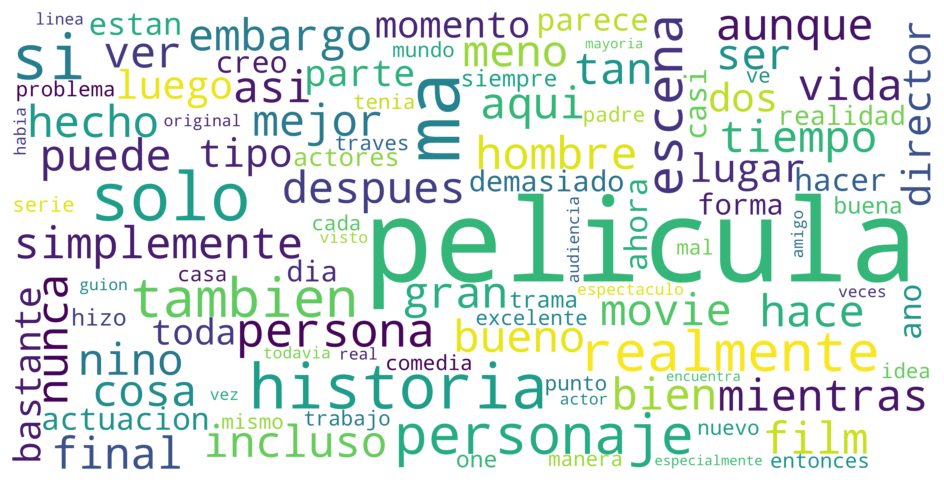

In [46]:
# Probando una wordcloud antes de la lematización

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Unimos los tokens sin stopwords en un solo string para cada reseña
df['first_cloud'] = df['tokens_sin_stopwords'].apply(lambda x: ' '.join(x))

#Hacemos la nube
first_word_cloud_text = ''.join(df['first_cloud'])
print(len(first_word_cloud_text))

wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="white",
    scale=10,
    width=800,
    height=400
).generate(first_word_cloud_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [47]:
# Cargamos el modelo de spaCy en español
nlp = spacy.load('es_core_news_sm')

# Lematización usando spaCy
def lemmatize_text(text):
    doc = nlp(' '.join(text))
    return [token.lemma_ for token in doc]

df['lemmas'] = df['tokens_sin_stopwords'].apply(lemmatize_text)

# Mostramos las palabras lematizadas
df[['tokens_sin_stopwords', 'lemmas']].head()

,tokens_sin_stopwords,lemmas
0,"[criticos, mencionado, despues, ver, solo, oz,...","[critico, mencionado, despues, ver, solo, oz, ..."
1,"[pequena, pequena, produccionla, tecnica, film...","[pequena, pequena, produccionla, tecnico, film..."
2,"[pense, manera, maravillosa, pasar, tiempo, fi...","[pense, manera, maravilloso, pasar, tiempo, fi..."
3,"[basicamente, familia, nino, pequeno, jake, pi...","[basicamente, familia, nino, pequeno, jake, pe..."
4,"[amor, tiempo, petter, mattei, pelicula, visua...","[amor, tiempo, petter, mattei, pelicular, visu..."


In [48]:
df.head()

,review_es,sentimiento,lower_text,text,tokens,tokens_sin_stopwords,first_cloud,lemmas
0,Uno de los otros críticos ha mencionado que de...,positivo,uno de los otros críticos ha mencionado que de...,uno de los otros criticos ha mencionado que de...,"[uno, de, los, otros, criticos, ha, mencionado...","[criticos, mencionado, despues, ver, solo, oz,...",criticos mencionado despues ver solo oz episod...,"[critico, mencionado, despues, ver, solo, oz, ..."
1,Una pequeña pequeña producción.La técnica de f...,positivo,una pequeña pequeña producción.la técnica de f...,una pequena pequena produccionla tecnica de fi...,"[una, pequena, pequena, produccionla, tecnica,...","[pequena, pequena, produccionla, tecnica, film...",pequena pequena produccionla tecnica filmacion...,"[pequena, pequena, produccionla, tecnico, film..."
2,Pensé que esta era una manera maravillosa de p...,positivo,pensé que esta era una manera maravillosa de p...,pense que esta era una manera maravillosa de p...,"[pense, que, esta, era, una, manera, maravillo...","[pense, manera, maravillosa, pasar, tiempo, fi...",pense manera maravillosa pasar tiempo fin sema...,"[pense, manera, maravilloso, pasar, tiempo, fi..."
3,"Básicamente, hay una familia donde un niño peq...",negativo,"básicamente, hay una familia donde un niño peq...",basicamente hay una familia donde un nino pequ...,"[basicamente, hay, una, familia, donde, un, ni...","[basicamente, familia, nino, pequeno, jake, pi...",basicamente familia nino pequeno jake piensa z...,"[basicamente, familia, nino, pequeno, jake, pe..."
4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo,"el ""amor en el tiempo"" de petter mattei es una...",el amor en el tiempo de petter mattei es una p...,"[el, amor, en, el, tiempo, de, petter, mattei,...","[amor, tiempo, petter, mattei, pelicula, visua...",amor tiempo petter mattei pelicula visualmente...,"[amor, tiempo, petter, mattei, pelicular, visu..."


In [49]:
# Unimos las palabras lematizadas en un solo string para cada reseña
df['lemmas_str'] = df['lemmas'].apply(lambda x: ' '.join(x))
# Unimos las palabras lematizadas en un solo string para cada reseña
df['lemmas_str']

,lemmas_str
0,critico mencionado despues ver solo oz episodi...
1,pequena pequena produccionla tecnico filmacion...
2,pense manera maravilloso pasar tiempo fin sema...
3,basicamente familia nino pequeno jake pensar z...
4,amor tiempo petter mattei pelicular visualment...
...,...
4995,interesante pelicula strass multipl sospechoso...
4996,ver serie salio primero vez ano i tenia anos v...
4997,vez mas jet li traer presencia carismatico pan...
4998,alquile pelicula despues escuchar chris gorar ...


In [50]:
# Aplicamos TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=500)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['lemmas_str'])

# Convertimos la matriz de TF-IDF en un DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Mostramos las primeras filas del TF-IDF
tfidf_df.head()

,about,absolutamente,absoluto,aburrido,acabar,accion,actor,actriz,actuacion,actuación,...,what,when,which,who,will,with,would,yo,you,él
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.101281
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.137288,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.068554
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.143538
4,0.0,0.0,0.0,0.0,0.0,0.100248,0.000000,0.0,0.07996,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


4852764


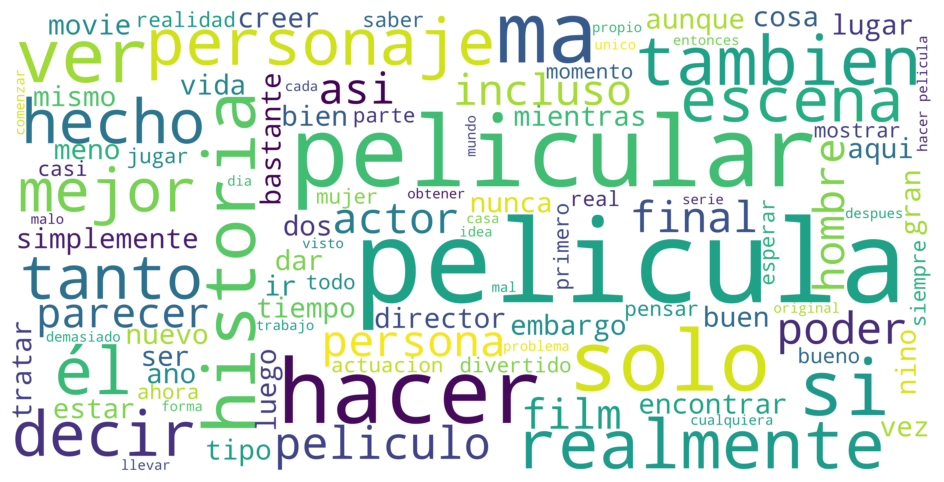

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_cloud_text = ''.join(df['lemmas_str'])
print(len(word_cloud_text))

wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="white",
    scale=10,
    width=800,
    height=400
).generate(word_cloud_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

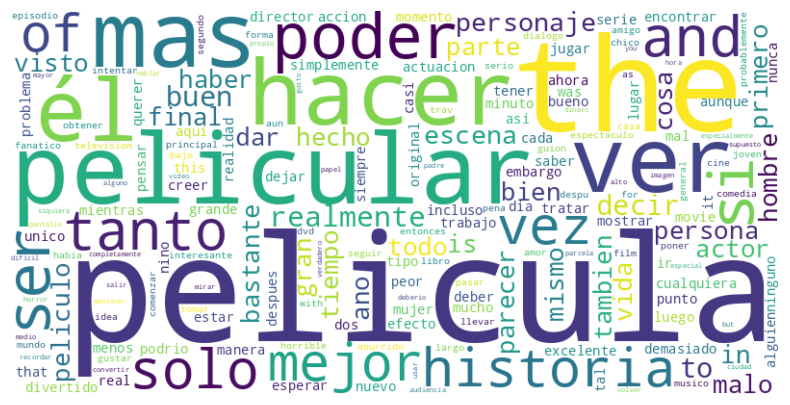

In [52]:
# Con apoyo de la IA , se visualiza una segunda nube de palabras realizando una sumatoría de los pesos sobre los reviews

from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Crear el vectorizador y transformar los textos
vectorizer = TfidfVectorizer()
tfidf_matriz = vectorizer.fit_transform(df['lemmas_str'])

# Crear un diccionario de palabras con su puntaje TF-IDF
palabras_tfidf = dict(zip(vectorizer.get_feature_names_out(), tfidf_matriz.sum(axis=0).A1))

# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(palabras_tfidf)

# Visualizar la nube
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [53]:
import pandas as pd
from unidecode import unidecode

# Ejemplo de DataFrame
# df = pd.DataFrame({'lemmas_str': ["él gusta de la resurrección", "me gustaría hacerlo"]})

# Función para remover acentos
df['lemmas_str_new'] = df['lemmas_str'].apply(unidecode)

# Mostrar el resultado
print(df['lemmas_str_new'])

0       critico mencionado despues ver solo oz episodi...
1       pequena pequena produccionla tecnico filmacion...
2       pense manera maravilloso pasar tiempo fin sema...
3       basicamente familia nino pequeno jake pensar z...
4       amor tiempo petter mattei pelicular visualment...
                              ...                        
4995    interesante pelicula strass multipl sospechoso...
4996    ver serie salio primero vez ano i tenia anos v...
4997    vez mas jet li traer presencia carismatico pan...
4998    alquile pelicula despues escuchar chris gorar ...
4999    gran decepcion micreo peor masttroiannimovieco...
Name: lemmas_str_new, Length: 5000, dtype: object


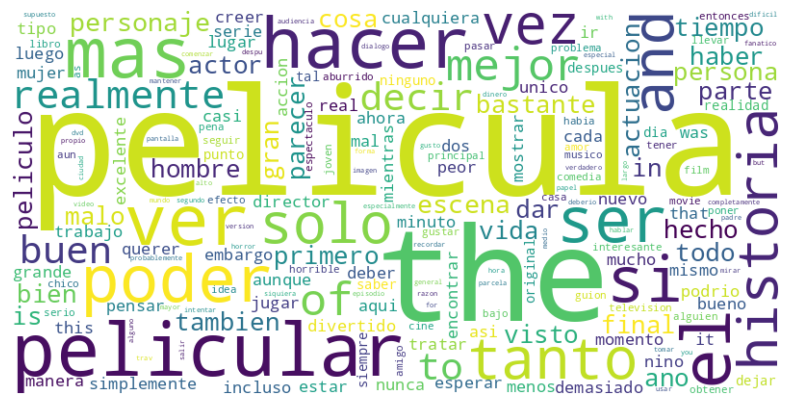

In [54]:
# Aplicamos el unicode de nuevo, pero esta vez a los lemas

from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Crear el vectorizador y transformar los textos
vectorizer = TfidfVectorizer()
tfidf_matriz = vectorizer.fit_transform(df['lemmas_str_new'])

# Crear un diccionario de palabras con su puntaje TF-IDF
palabras_tfidf = dict(zip(vectorizer.get_feature_names_out(), tfidf_matriz.sum(axis=0).A1))

# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(palabras_tfidf)

# Visualizar la nube
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [55]:
# Eliminamos las stopwords en ingles

import pandas as pd
import nltk
from nltk.corpus import stopwords

# Descargar las stopwords en caso de no tenerlas
nltk.download('stopwords')

# Lista de stopwords en inglés
stop_words_eng = set(stopwords.words('english'))

# Ejemplo de DataFrame
# df = pd.DataFrame({'lemmas_str_new': ["this is a sample sentence", "another example sentence here"]})

# Función para remover stopwords
def remover_stopwords(texto):
    palabras = texto.split()
    palabras_filtradas = [palabra for palabra in palabras if palabra.lower() not in stop_words_eng]
    return ' '.join(palabras_filtradas)

# Aplicar la función a la columna 'lemmas_str_new'
df['lemmas_str_new'] = df['lemmas_str_new'].apply(remover_stopwords)

# Mostrar el resultado
print(df['lemmas_str_new'])


0       critico mencionado despues ver solo oz episodi...
1       pequena pequena produccionla tecnico filmacion...
2       pense manera maravilloso pasar tiempo fin sema...
3       basicamente familia nino pequeno jake pensar z...
4       amor tiempo petter mattei pelicular visualment...
                              ...                        
4995    interesante pelicula strass multipl sospechoso...
4996    ver serie salio primero vez ano tenia anos vi ...
4997    vez mas jet li traer presencia carismatico pan...
4998    alquile pelicula despues escuchar chris gorar ...
4999    gran decepcion micreo peor masttroiannimovieco...
Name: lemmas_str_new, Length: 5000, dtype: object


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


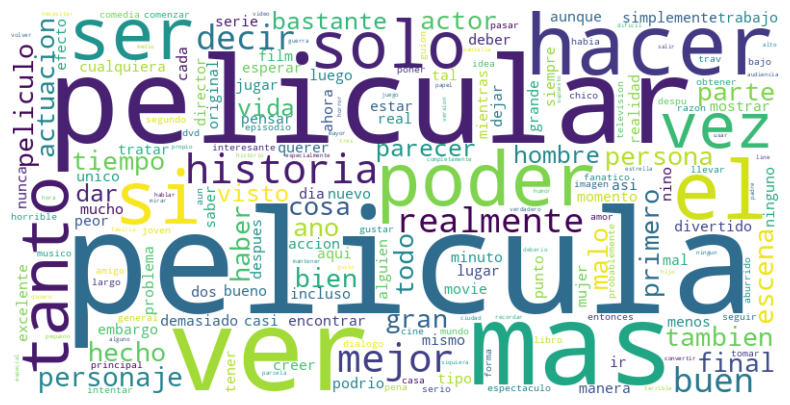

In [56]:
# Ultima nube de palabras

from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Crear el vectorizador y transformar los textos
vectorizer = TfidfVectorizer()
tfidf_matriz = vectorizer.fit_transform(df['lemmas_str_new'])

# Crear un diccionario de palabras con su puntaje TF-IDF
palabras_tfidf = dict(zip(vectorizer.get_feature_names_out(), tfidf_matriz.sum(axis=0).A1))

# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(palabras_tfidf)

# Visualizar la nube
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [57]:
df


,review_es,sentimiento,lower_text,text,tokens,tokens_sin_stopwords,first_cloud,lemmas,lemmas_str,lemmas_str_new
0,Uno de los otros críticos ha mencionado que de...,positivo,uno de los otros críticos ha mencionado que de...,uno de los otros criticos ha mencionado que de...,"[uno, de, los, otros, criticos, ha, mencionado...","[criticos, mencionado, despues, ver, solo, oz,...",criticos mencionado despues ver solo oz episod...,"[critico, mencionado, despues, ver, solo, oz, ...",critico mencionado despues ver solo oz episodi...,critico mencionado despues ver solo oz episodi...
1,Una pequeña pequeña producción.La técnica de f...,positivo,una pequeña pequeña producción.la técnica de f...,una pequena pequena produccionla tecnica de fi...,"[una, pequena, pequena, produccionla, tecnica,...","[pequena, pequena, produccionla, tecnica, film...",pequena pequena produccionla tecnica filmacion...,"[pequena, pequena, produccionla, tecnico, film...",pequena pequena produccionla tecnico filmacion...,pequena pequena produccionla tecnico filmacion...
2,Pensé que esta era una manera maravillosa de p...,positivo,pensé que esta era una manera maravillosa de p...,pense que esta era una manera maravillosa de p...,"[pense, que, esta, era, una, manera, maravillo...","[pense, manera, maravillosa, pasar, tiempo, fi...",pense manera maravillosa pasar tiempo fin sema...,"[pense, manera, maravilloso, pasar, tiempo, fi...",pense manera maravilloso pasar tiempo fin sema...,pense manera maravilloso pasar tiempo fin sema...
3,"Básicamente, hay una familia donde un niño peq...",negativo,"básicamente, hay una familia donde un niño peq...",basicamente hay una familia donde un nino pequ...,"[basicamente, hay, una, familia, donde, un, ni...","[basicamente, familia, nino, pequeno, jake, pi...",basicamente familia nino pequeno jake piensa z...,"[basicamente, familia, nino, pequeno, jake, pe...",basicamente familia nino pequeno jake pensar z...,basicamente familia nino pequeno jake pensar z...
4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo,"el ""amor en el tiempo"" de petter mattei es una...",el amor en el tiempo de petter mattei es una p...,"[el, amor, en, el, tiempo, de, petter, mattei,...","[amor, tiempo, petter, mattei, pelicula, visua...",amor tiempo petter mattei pelicula visualmente...,"[amor, tiempo, petter, mattei, pelicular, visu...",amor tiempo petter mattei pelicular visualment...,amor tiempo petter mattei pelicular visualment...
...,...,...,...,...,...,...,...,...,...,...
4995,Una interesante película de strass con múltipl...,negativo,una interesante película de strass con múltipl...,una interesante pelicula de strass con multipl...,"[una, interesante, pelicula, de, strass, con, ...","[interesante, pelicula, strass, multiples, sos...",interesante pelicula strass multiples sospecho...,"[interesante, pelicula, strass, multipl, sospe...",interesante pelicula strass multipl sospechoso...,interesante pelicula strass multipl sospechoso...
4996,Vi a esta serie cuando salió por primera vez e...,positivo,vi a esta serie cuando salió por primera vez e...,vi a esta serie cuando salio por primera vez e...,"[vi, a, esta, serie, cuando, salio, por, prime...","[vi, serie, salio, primera, vez, anos, i, teni...",vi serie salio primera vez anos i tenia anos v...,"[ver, serie, salio, primero, vez, ano, i, teni...",ver serie salio primero vez ano i tenia anos v...,ver serie salio primero vez ano tenia anos vi ...
4997,"Una vez más, Jet Li trae su presencia carismát...",positivo,"una vez más, jet li trae su presencia carismát...",una vez mas jet li trae su presencia carismati...,"[una, vez, mas, jet, li, trae, su, presencia, ...","[vez, mas, jet, li, trae, presencia, carismati...",vez mas jet li trae presencia carismatica pant...,"[vez, mas, jet, li, traer, presencia, carismat...",vez mas jet li traer presencia carismatico pan...,vez mas jet li traer presencia carismatico pan...
4998,"¡Alquilé esta película, después de escuchar a ...",negativo,"¡alquilé esta pe

In [58]:
# Con apoyo de la IA , predecimos el sentimiento

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import nltk
from nltk.corpus import stopwords
from unidecode import unidecode

# Descargar las stopwords en caso de no tenerlas
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Limpiar el texto
def limpiar_texto(texto):
    # Remover acentos
    texto = unidecode(texto)
    # Eliminar stopwords
    palabras = texto.split()
    palabras_filtradas = [palabra for palabra in palabras if palabra.lower() not in stop_words]
    return ' '.join(palabras_filtradas)

# Limpiar el campo 'review_es'
df['review_es'] = df['review_es'].apply(limpiar_texto)

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df['review_es'], df['sentimiento'], test_size=0.2, random_state=42)

# Convertir textos a vectores TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Entrenar el modelo de regresión logística
modelo = LogisticRegression()
modelo.fit(X_train_tfidf, y_train)

# Hacer predicciones
y_pred = modelo.predict(X_test_tfidf)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {accuracy:.4f}")

# Hacer predicciones para toda la columna 'review_es' y agregarla como 'pred_sent'
df['pred_sent'] = modelo.predict(vectorizer.transform(df['review_es']))

# Verificar si las predicciones coinciden con los valores originales
df['coincide'] = df['pred_sent'] == df['sentimiento']

# Mostrar los primeros registros
print(df[['review_es', 'sentimiento', 'pred_sent', 'coincide']])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Exactitud del modelo: 0.8310
                                              review_es sentimiento pred_sent  \
0     Uno de los otros criticos ha mencionado que de...    positivo  positivo   
1     Una pequena pequena produccion.La tecnica de f...    positivo  positivo   
2     Pense que esta era una manera maravillosa de p...    positivo  positivo   
3     Basicamente, hay una familia donde un nino peq...    negativo  negativo   
4     El "amor en el tiempo" de Petter Mattei es una...    positivo  positivo   
...                                                 ...         ...       ...   
4995  Una interesante pelicula de strass con multipl...    negativo  negativo   
4996  Vi esta serie cuando salio por primera vez en ...    positivo  positivo   
4997  Una vez mas, Jet Li trae su presencia carismat...    positivo  positivo   
4998  !Alquile esta pelicula, despues de escuchar Ch...    negativo  negativo   
4999  Esta fue una gran decepcion para mi.Creo que e...    negativo  negativo   

In [59]:
# Mostrar los primeros registros
df[['review_es', 'sentimiento', 'pred_sent', 'coincide']]

,review_es,sentimiento,pred_sent,coincide
0,Uno de los otros criticos ha mencionado que de...,positivo,positivo,True
1,Una pequena pequena produccion.La tecnica de f...,positivo,positivo,True
2,Pense que esta era una manera maravillosa de p...,positivo,positivo,True
3,"Basicamente, hay una familia donde un nino peq...",negativo,negativo,True
4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo,positivo,True
...,...,...,...,...
4995,Una interesante pelicula de strass con multipl...,negativo,negativo,True
4996,Vi esta serie cuando salio por primera vez en ...,positivo,positivo,True
4997,"Una vez mas, Jet Li trae su presencia carismat...",positivo,positivo,True
4998,"!Alquile esta pelicula, despues de escuchar Ch...",negativo,negativo,True


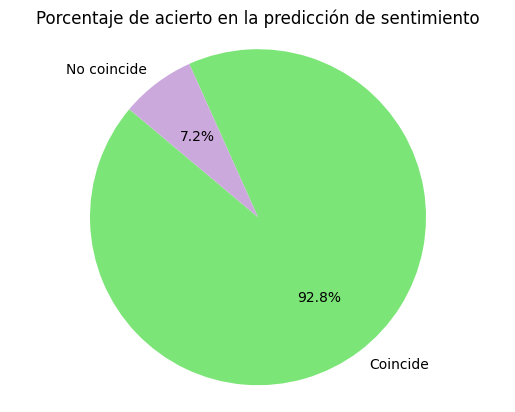

In [60]:
import matplotlib.pyplot as plt

# Contar los valores de acierto y desacierto en 'coincide'
conteo_aciertos = df['coincide'].value_counts()

# Crear el pie chart
labels = ['Coincide', 'No coincide']
colors = ['#7CE577', '#cca9dd']
plt.pie(conteo_aciertos, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Porcentaje de acierto en la predicción de sentimiento')
plt.axis('equal')  # Para que el pie chart sea un círculo
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

# Vectorización del texto
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(df['review_es'])
y = df['sentimiento']

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Configuración de parámetros para el modelo SVM
parametros = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],  # lineal y gaussiano
    'gamma': ['scale', 'auto']    # coeficiente para el kernel rbf
}

# GridSearch para encontrar los mejores parámetros
grid_search = GridSearchCV(SVC(), parametros, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado
mejor_modelo_svm = grid_search.best_estimator_

# Evaluar el modelo en los datos de prueba
y_pred = mejor_modelo_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Exactitud del modelo SVM optimizado: {accuracy:.4f}")

# Asignar predicciones a la columna 'pred_sent' en el DataFrame original
df['pred_sent'] = mejor_modelo_svm.predict(vectorizer.transform(df['review_es']))

# Visualizar el resultado
print(df[['review_es', 'sentimiento', 'pred_sent']])

In [ ]:
df[['review_es', 'sentimiento', 'pred_sent', 'coincide']]

In [ ]:
import matplotlib.pyplot as plt

# Contar los valores de acierto y desacierto en 'coincide'
conteo_aciertos = df['coincide'].value_counts()

# Crear el pie chart
labels = ['Coincide', 'No coincide']
colors = ['#7CE577', '#cca9dd']
plt.pie(conteo_aciertos, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Porcentaje de acierto en la predicción de sentimiento')
plt.axis('equal')  # Para que el pie chart sea un círculo
plt.show()

In [ ]:
# Crear un nuevo DataFrame solo con los registros en los que el modelo se equivocó
df_errores = df[df['coincide'] == False].reset_index(drop=True)

# Mostrar los primeros registros para revisar
df_errores[['review_es', 'sentimiento', 'pred_sent']]

In [ ]:
df_errores['review_es'][0]

In [ ]:
# Creamos un nuevo DataFrame solo con los registros en los que el modelo se equivocó
df_errores_positivos = df[df['sentimiento'] == 'positivo'].reset_index(drop=True)
df_errores_negativos = df[df['sentimiento'] == 'negativo'].reset_index(drop=True)

In [ ]:
df_errores_positivos['review_es'][0]

In [ ]:
df_errores_positivos['review_es'][1]

In [ ]:
df_errores_positivos['review_es'][2]

In [ ]:
df_errores_negativos['review_es'][0]

In [ ]:
df_errores_negativos['review_es'][1]

In [ ]:
df_errores_negativos['review_es'][2]

Sucede lo mismo con el comportamiento de negativos y de positivos, puede que sea un error posiblemente causad por el entrenamiento implementado. Para aumentar la presición, podria ser necesario oto metodo de entrenamiento dependiendo de si el review es positivo o negativo.